In [1]:
# RUN THIS ONCE 
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp39-cp39-linux_x86_64.whl size=317890 sha256=a0830c69bc20db1cb775c320cb673f50fa6c7d14d8d96476f1bcc0cb06c4cf3e
  Stored in directory: /root/.cache/pip/wheels/09/e7/bc/33685b60ab54dba969596dd87244ee9f4c2e83dff9a53d4f20
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [2]:
# suppress warnings that come with installing the wordcloud package 
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)

In [3]:
%%R
# this will run for a long time, don't be alarmed 
install.packages("wordcloud")
install.packages("ggrepel")

In [5]:
%%R 
library('tidyverse') 
library('wordcloud')
library('ggrepel')
df <- read_csv('/processedData1.csv') # load data 
df <- df %>% rename('rank'=Rank, 
                    'nation'=`Nation (NOC)`, 
                    'continents'=Continents, 
                    'no_games'=`No. of Games`, 
                    'freq_comp'=`Frequency of Competition`, 
                    'wins'=Wins,
                    'losses'=Losses,
                    'total'=Total,
                    'freq_gold_personal'=`% of Medals that are Gold`,
                    'freq_gold_all'=`% of All Gold Medals`) # rename columns for easier typing

df

Rows: 148 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Nation (NOC), Continents, Frequency of Competition
dbl (7): Rank, No. of Games, Wins, Losses, Total, % of Medals that are Gold,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 148 × 10
    rank nation        continents no_games freq_comp           wins losses total
   <dbl> <chr>         <chr>         <dbl> <chr>              <dbl>  <dbl> <dbl>
 1     1 United States Americas         28 Almost Always Com…  1061   1575  2636
 2     2 Soviet Union  Europe           10 Moderately Compet…   440    682  1122
 3     3 Germany       Europe           25 Almost Always Com…   285    689   974
 4     4 Great Britain Europe           29 Almost Always Com…   285    630   915
 5     5 China         Asia             11 Average              262    372   634

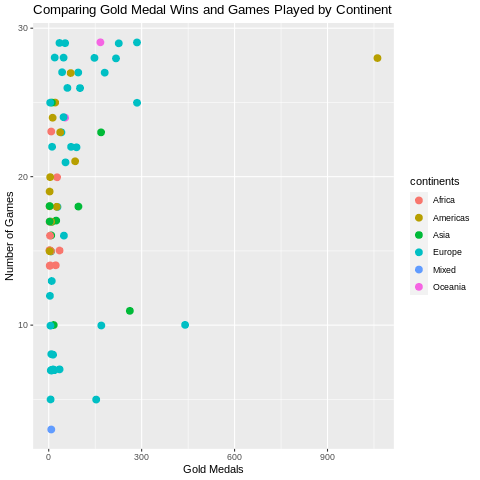

In [6]:
%%R
# wrangle data: remove rows where continents values = N/A
continents <- df %>% filter(continents!='N/A')
# visualize data: want to plot continents, no_games, and gold medals won
# want to see if as number of games increases, do gold medals won increase (meaning country becomes better competitor)?
ggplot(continents, aes(wins, no_games, color=continents)) + geom_jitter(height=0.05, size=3) + labs(x="Gold Medals", y="Number of Games", title="Comparing Gold Medal Wins and Games Played by Continent")

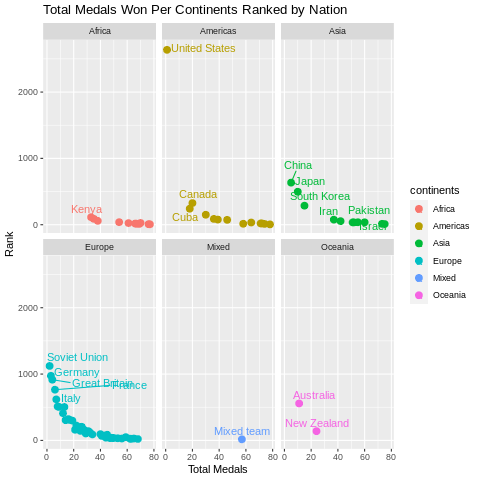

In [56]:
%%R
# wrangle data to remove rows with no medals won
medals <- df %>% filter(total!=0) %>% filter(continents!='N/A')
medals2 <- medals %>% group_by(continents, nation) %>% mutate("nation_name" = nation)
# visualize: want to plot medals won vs rank for each continent on diff plots, made colorful for aesthetics
ggplot(medals2, aes(rank, total, color=continents)) + geom_point(size=3) + geom_text_repel(aes(label = nation_name), nudge_y=20) + labs(title="Total Medals Won Per Continents Ranked by Nation", x ="Total Medals", y = "Rank") + facet_wrap(~ continents)

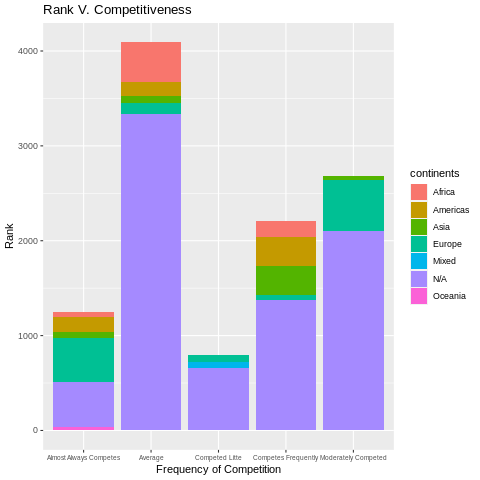

In [53]:
%%R
# visualization: bar chart of frequency of competition and rank, colored by continents
ggplot(data=df, aes(freq_comp, rank, fill=continents)) + geom_col() + labs(title="Rank V. Competitiveness", x ="Frequency of Competition", y = "Rank")+ theme(axis.text.x = element_text(size=6.5))

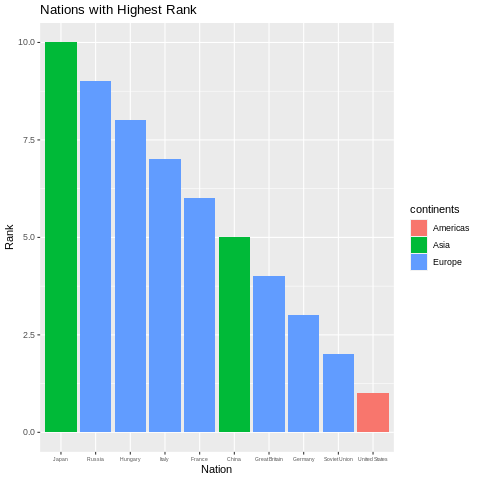

In [55]:
%%R
# wrangle nations: only want top 10
nations <- df %>% filter(rank<=10)
# visualization: bar chart of nations ordered by rank, colored by continent
ggplot(nations, aes(x=reorder(nation, desc(rank)), y=rank, fill=continents)) + geom_col() + labs(title="Nations with Highest Rank", x ="Nation", y = "Rank")+ theme(axis.text.x = element_text(size=5))

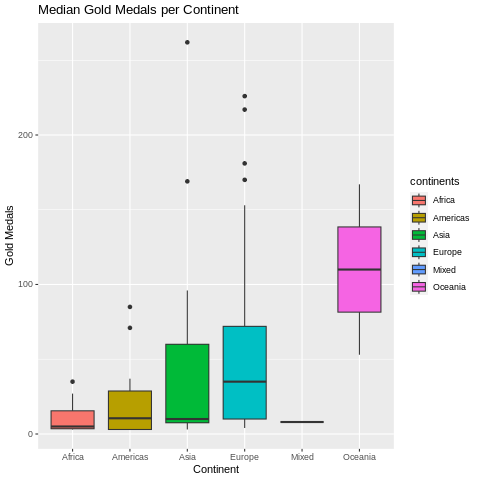

In [79]:
%%R
# wrangle: remove outlier: the us
continents <- df %>% filter(nation!='United States') %>% filter(nation!='Soviet Union') %>% filter(nation!='Germany') %>% filter(nation!='Great Britain') %>% filter(continents!='N/A')
# visualize: box plot: to show median gold medals per continent
ggplot(continents, aes(continents, wins, fill=continents)) + geom_boxplot() + labs(title="Median Gold Medals per Continent", x ="Continent", y = "Gold Medals")

Produce 5 visualizations from the dataset and wrangle the dataset for at least 2 visualizations.
Explore at least 3 separate dimensions.
Polish: add labels, a title, custom axis ticks, etc.